In [7]:
import numpy as np
import hw5basis2d as b2d

# Homework 5

## 1. $\quad$ 1D Finite Element Analysis with High-order Polynomials:
Complete the first three tasks from the prompt CE_ME_507_High_Order_Polynomials_Prompt.pdf.

>1. Change the function you use to compute basis functions to work on arbitrary polynomial degree. This means that you will need to have your function that evaluates a basis function to additionally take as input polynomial degree. Use the following formula for Bernstein polynomial bases, where $t \in [0,1]$:
> $$ N^{p}_{A} = {p \choose A} t^{A}(1 - t)^{p-A}$$

**From hw5basis.py (attached): **
```
def NBasis(deg, N_idx, t):
    p = deg
    a = N_idx
    pca = math.comb(p, a)
    N_term1 = pca
    N_term3 = t**a
    N_term2 = (1-t)**(p-a)
    return N_term1 * N_term2 * N_term3
```

>2. Change the function you use to compute derivatives of basis functions to work on arbitrary polynomial degree. We talked about how to do this in class. If you forgot, just use the product rule on the above equation.


**From hw5basis.py (attached): **
```
def NBasisDerv(deg, N_idx, t):
    p = deg
    a = N_idx
    pca = math.comb(p, a)
    if a == 0:
        N_derv_t1 = 0
    else:
        N_derv_t1 = a * t**(a-1) * (1-t)**(p-a)
    if p == a:
        N_derv_t2 = 0
    else: 
        N_derv_t2 = (p-a) * t**a *(1-t)**(p-a-1)
    N_derv = pca * (N_derv_t1 - N_derv_t2)
    return N_derv
```

>3. Modify your function that computes the mapping from a parent domain to the current element ($x(\xi)$) and your function that computes the derivative of this map ($x_{i,\xi}(\xi)$) to operate on the interval [0, 1] rather than [−1, 1].

**From hw5basis.py (attached):** 
```
def XMap(x0,x1,xi,p):
    x = 0
    xvals = np.linspace(x0,x1,p+1)
    for a in range(0,len(xvals)):
        x += NBasis(deg=p, N_idx=a, t=xi) * xvals[a]
    return x

def XMapDerv(x0,x1,xi,p):
      x_derv = 0
      xvals = np.linspace(x0,x1,p+1)
      for a in range(0,len(xvals)):
          x_derv += NBasisDerv(deg=p, N_idx=j, t=xi) * xvals[a]
      return x_derv
```

## 2. $\quad$ 2D code completion
2. Complete the following code to define a 2D bilinear basis function (Eq. 3.2.14). Plot your results for each of the four basis functions (as given in the python functionality) to visualize the basis functions. Also complete code that will take a list of 4 numpy arrays (representing x and y coordinates of corners of a quadrilateral) and evaluate the mapping from parametric domain into this quadrilateral. Again, plot your results to validate that it works. Submit your completed code.

**Plots are below. See hw5basis2d.py (attached) for complete code.**


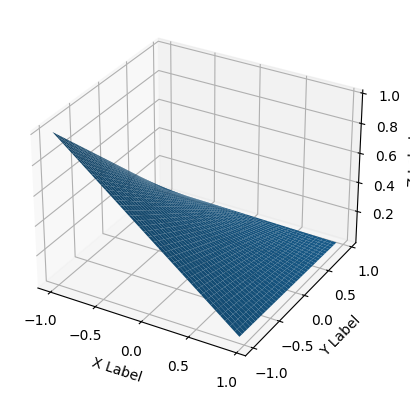

In [8]:
b2d.PlotBasisFunction(0)

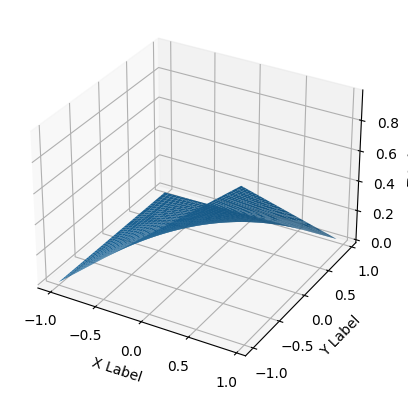

In [9]:
b2d.PlotBasisFunction(1)

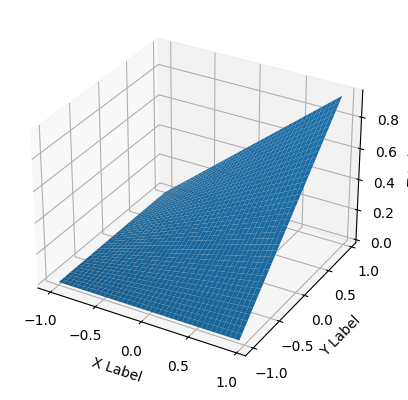

In [10]:
b2d.PlotBasisFunction(2)

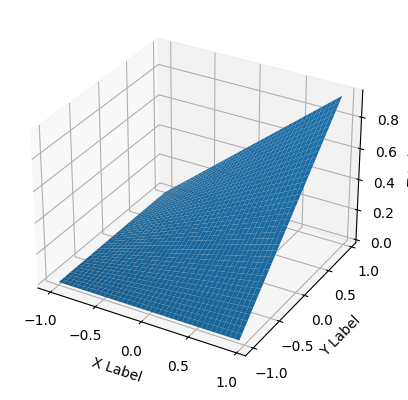

In [11]:
b2d.PlotBasisFunction(2)

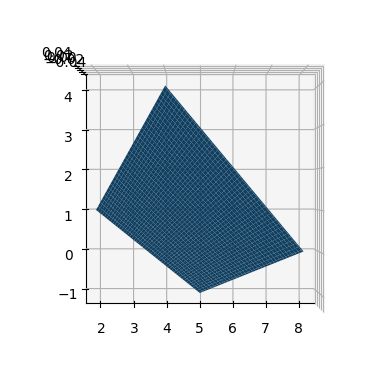

In [13]:
X_pts = [np.array([2, 1]), np.array([ 5, -1]), np.array([8, 0]), np.array([4, 4])]
b2d.PlotTransformationMap(X_pts)